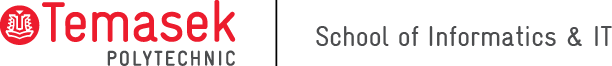
## <center>  Data Science Essentials (CIA2C14)</center>
### <center>  Assignment 2 </center>

### <font color=red>Fill in your personal data below

#### <font color=blue>Name: Alam Rithika<font color=black>
#### <font color=blue>Admin No: 2202550F<font color=black>
#### <font color=blue>Class: P04<font color=black> 

### <font color=red> Declaration of Originality

#### "I am the originator of this work and I have appropriately acknowledged all other original sources used as my reference for this work.

#### I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.

#### I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced."

Please sign your name or insert a picture of your signature in the markdown cell below. (double click on the cell)

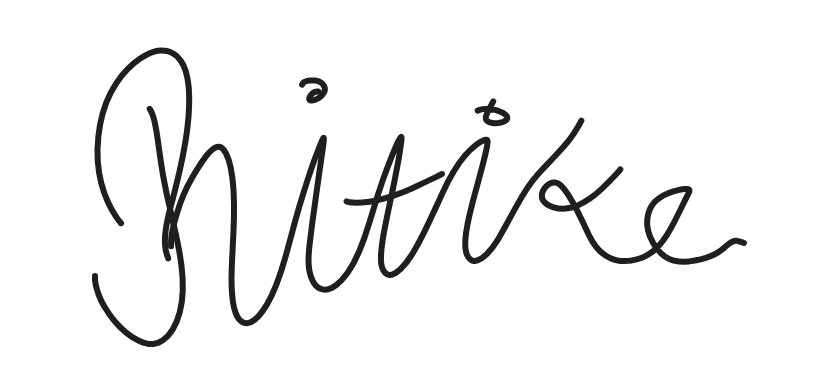

#### 1. This deliverable is worth 45% of the final marks for DSES. The total mark is 90. There are two submissions required- Part I and Part II The due dates are  <font color=red>10 Jul and 14 Aug 2023, 09:00 am. 
#### 2. For Part I submission, you need to complete Task 1 Data Preparation and Task 2: Data Understanding.
#### 3. For Part II submission, you need to complete Task 3: Data Modelling and Task 4: Recommendations & Conclusion.
#### 4. Note that you should still keep your codes for Part I for tutor to evaluate Part II. 
#### 5. This is an individual deliverable. You are required to produce your own work.
#### 6. You are allowed to use packages (libraries) not covered in the lecture slides or practicals (e.g. scikit-learn, seaborn, etc.)
#### 7. Apart from using Markdown cells to include your description, take-aways, and comments, provide sufficient comments to your codes too. 
#### 8. Use random_state= Your Admin Number without the letter wherever needed.
>e.g. random_state=2200212
#### 9. Name your notebook according to the following format. 
>e.g. YourName_2200001A_Assignment2
#### 10. You need to submit your deliverable, i.e. this Jupyter Notebook (.ipynb format) for marking.

# <font color= maroon> Project Background & Aims 

Ohaiyo Pte Ltd, a bicycle rental company in Japan, is looking to expand its business by making informed decisions based on data-driven evidence. They have collected data on past bicycle rentals and are now seeking the help of a Data Science team to analyze the data and understand customer behaviors. The goal is to build predictive models that can identify the factors influencing bike rental demand. By following the Data Science Life Cycle, the team will analyze the data, uncover patterns and correlations, and provide recommendations to Ohaiyo for their business plans, such as purchasing more bicycles, opening new outlets, or hiring additional manpower.

# <font color= maroon>  Data Preparation 

Missing value cleaning involves identifying and handling null or missing values in a dataset. This process includes techniques such as imputation, where missing values are filled in with estimated or calculated values, or removal of records with missing values. Cleaning missing values ensures that the dataset is complete and suitable for analysis, minimizing the impact of missing data on the accuracy of results.

## <font color= grey> Data Cleaning

In [1]:
pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier


# Read the dataset into a pandas DataFrame
df = pd.read_csv("Assignment2_Dataset.csv")

# Identify columns with missing values
df.isnull().sum()

S/N                   0
Date                  0
Country               0
Rented_Bike_Count    12
Hour                 24
Temperature          24
Humidity             12
Windspeed             0
Visibility            0
Dewpoint_Temp         0
Solar_Radiation       0
Rainfall              0
Snowfall             12
Open                  0
Hit_Sales            20
Region                0
Latitude              0
Longitude             0
dtype: int64

In [4]:
# Check for duplicates
has_duplicates = df.duplicated().any()

# Print the result
if has_duplicates:
    print("There are duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")


There are no duplicates in the DataFrame.


In [5]:
df.shape

(8763, 18)

In [6]:
df.describe()

,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
count,8763.000000,8751.000000,8739.000000,8739.000000,8751.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4382.000000,708.364987,11.521684,13.152249,58.238601,1.724649,3.725436,4.074027,0.568916,0.148636,37.505406,127.996172
std,2529.804538,736.971460,6.910710,13.568357,20.362598,1.036229,1.070309,13.060726,0.868661,1.128003,0.287705,0.290047
min,1.000000,-2.000000,0.000000,-44.500000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,37.000169,127.500077
25%,2191.500000,191.500000,6.000000,3.400000,42.000000,0.900000,3.000000,-4.700000,0.000000,0.000000,37.261747,127.749186
50%,4382.000000,505.000000,12.000000,13.800000,57.000000,1.500000,4.000000,5.100000,0.010000,0.000000,37.506158,127.995693
75%,6572.500000,1066.000000,18.000000,22.600000,74.000000,2.300000,5.000000,14.800000,0.930000,0.000000,37.758616,128.248434
max,8763.000000,34180.000000,23.000000,166.600000,98.000000,7.400000,5.000000,27.200000,3.520000,35.000000,37.999835,128.499946


# Rented_Bike_Count

In [7]:
column_with_missing = 'Rented_Bike_Count'
related_column = 'Hour'

# Calculate the group-wise mean for imputation
imputation_values = df.groupby(related_column)[column_with_missing].transform('mean')

# Fill the missing values with the group-wise mean
df[column_with_missing].fillna(imputation_values, inplace=True)
df.describe()

,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
count,8763.000000,8763.000000,8739.000000,8739.000000,8751.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4382.000000,708.084828,11.521684,13.152249,58.238601,1.724649,3.725436,4.074027,0.568916,0.148636,37.505406,127.996172
std,2529.804538,736.580541,6.910710,13.568357,20.362598,1.036229,1.070309,13.060726,0.868661,1.128003,0.287705,0.290047
min,1.000000,-2.000000,0.000000,-44.500000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,37.000169,127.500077
25%,2191.500000,192.000000,6.000000,3.400000,42.000000,0.900000,3.000000,-4.700000,0.000000,0.000000,37.261747,127.749186
50%,4382.000000,506.000000,12.000000,13.800000,57.000000,1.500000,4.000000,5.100000,0.010000,0.000000,37.506158,127.995693
75%,6572.500000,1064.500000,18.000000,22.600000,74.000000,2.300000,5.000000,14.800000,0.930000,0.000000,37.758616,128.248434
max,8763.000000,34180.000000,23.000000,166.600000,98.000000,7.400000,5.000000,27.200000,3.520000,35.000000,37.999835,128.499946


1. Although the mean did change, it did not change singnificantly
2. The reason for using group mean imputation is that:
- the Rented_Bike_Count values sort of corresponds the values in Hour. Meaning that during a specific hour, the number of rentals during that specific hour for each day would be approximately the same. 
- for example, in one of the rows, the Hour is 18 and the Rented_Bike_Count value is 671. In another row, the Hour is also 18, and the Rented_Bike_Count is 700. 
- this shows that during a specific hour for each day, the number of bike rentals would be around the same.
- hence used group mean imputation
3. For further proof, below shows that Hour and Rented_Bike_Column has the highest correlation as compared to other columns.

In [8]:
# Calculate correlation between 'Hour' and other columns
hour_corr = df.corr()['Hour']

# Find the column with the highest correlation
highest_corr_column = hour_corr.drop('Hour').idxmax()
highest_corr_value = hour_corr.drop('Hour').max()

# Print the highest correlation and its corresponding column
print("Highest correlation with Hour:", highest_corr_value)
print("Column with highest correlation:", highest_corr_column)


Highest correlation with Hour: 0.3636583334324468
Column with highest correlation: Rented_Bike_Count


In [9]:
# Specify the row index you want to print
# the specific row i will be printing has a missing value in Rented_Bike_Column, hence just checking the value
row_index = 993

# Access and print the specific row
print(df.iloc[row_index])

S/N                         994
Date                  1/10/2019
Country                      JP
Rented_Bike_Count         225.0
Hour                        9.0
Temperature                -7.7
Humidity                   62.0
Windspeed                   3.6
Visibility                    4
Dewpoint_Temp             -13.7
Solar_Radiation            0.13
Rainfall                    0.0
Snowfall                    low
Open                        Yes
Hit_Sales                     N
Region                    South
Latitude              37.183246
Longitude            127.773782
Name: 993, dtype: object


# Hour

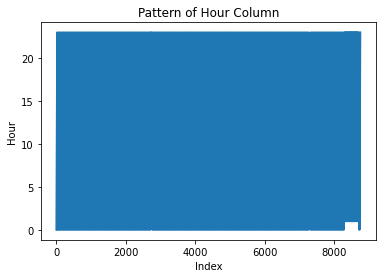

In [10]:
#plotting a line graph
plt.plot(df['Hour'])
plt.xlabel('Index')
plt.ylabel('Hour')
plt.title('Pattern of Hour Column')
plt.show()

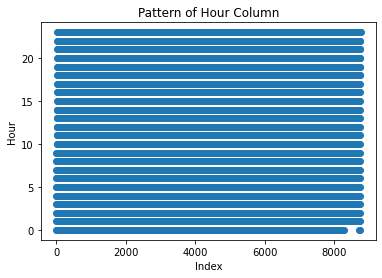

In [11]:
#plotting a scatter graph
plt.scatter(range(len(df)), df['Hour'])
plt.xlabel('Index')
plt.ylabel('Hour')
plt.title('Pattern of Hour Column')
plt.show()


1. A scatter plot has been used to display the pattern of the "Hour" column. Each point on the plot represents an hour value, and the repeating pattern becomes evident.
2. A line plot has been used to show the sequential nature of the "Hour" column and emphasize the repeating pattern.
3. Both plots showcase the repeating pattern from 0 to 23, and the missing value at 0 will be visually evident as a gap in both the plots. 


In [12]:
# Identify the column(s) with missing values
columns_with_missing_values = ['Hour']

# Impute the specific value of '0' in rows with missing values
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(0)

# Print the updated DataFrame
# Specify the row index you want to print
row_index = 8691

# Access and print the specific row
print(df.iloc[row_index])

S/N                        8692
Date                 11/29/2019
Country                      JP
Rented_Bike_Count         517.0
Hour                        0.0
Temperature                 2.2
Humidity                   30.0
Windspeed                   0.7
Visibility                    4
Dewpoint_Temp             -13.6
Solar_Radiation             0.0
Rainfall                    0.0
Snowfall                    low
Open                        Yes
Hit_Sales                     N
Region                    South
Latitude              37.822047
Longitude            127.616767
Name: 8691, dtype: object


In [13]:
df.isnull().sum()

S/N                   0
Date                  0
Country               0
Rented_Bike_Count     0
Hour                  0
Temperature          24
Humidity             12
Windspeed             0
Visibility            0
Dewpoint_Temp         0
Solar_Radiation       0
Rainfall              0
Snowfall             12
Open                  0
Hit_Sales            20
Region                0
Latitude              0
Longitude             0
dtype: int64

# Temperature

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the subset of data with complete 'Temperature' values and relevant predictor variables
complete_data = df.dropna(subset=['Temperature', 'Hour', 'Solar_Radiation'])

# Select the subset of data with missing 'Temperature' values and relevant predictor variables
missing_data = df[df['Temperature'].isnull()][['Hour', 'Solar_Radiation']]

# Prepare the predictor variables and target variable
X_train = complete_data[['Hour', 'Solar_Radiation']]
y_train = complete_data['Temperature']

# Create a regression model and fit it using the complete data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict the missing 'Temperature' values using the trained regression model
predicted_temps = regression_model.predict(missing_data[['Hour', 'Solar_Radiation']])

# Impute the missing 'Temperature' values with the predicted values
df.loc[df['Temperature'].isnull(), 'Temperature'] = predicted_temps




In [15]:
df.isnull().sum()

S/N                   0
Date                  0
Country               0
Rented_Bike_Count     0
Hour                  0
Temperature           0
Humidity             12
Windspeed             0
Visibility            0
Dewpoint_Temp         0
Solar_Radiation       0
Rainfall              0
Snowfall             12
Open                  0
Hit_Sales            20
Region                0
Latitude              0
Longitude             0
dtype: int64

In [16]:
df.describe()

,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
count,8763.000000,8763.000000,8763.000000,8763.000000,8751.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4382.000000,708.084828,11.490129,13.147107,58.238601,1.724649,3.725436,4.074027,0.568916,0.148636,37.505406,127.996172
std,2529.804538,736.580541,6.927461,13.550422,20.362598,1.036229,1.070309,13.060726,0.868661,1.128003,0.287705,0.290047
min,1.000000,-2.000000,0.000000,-44.500000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,37.000169,127.500077
25%,2191.500000,192.000000,5.000000,3.400000,42.000000,0.900000,3.000000,-4.700000,0.000000,0.000000,37.261747,127.749186
50%,4382.000000,506.000000,11.000000,13.800000,57.000000,1.500000,4.000000,5.100000,0.010000,0.000000,37.506158,127.995693
75%,6572.500000,1064.500000,17.000000,22.600000,74.000000,2.300000,5.000000,14.800000,0.930000,0.000000,37.758616,128.248434
max,8763.000000,34180.000000,23.000000,166.600000,98.000000,7.400000,5.000000,27.200000,3.520000,35.000000,37.999835,128.499946


1. 'Hour' and 'Solar_Radiation' are correlated with temperature and can be used as predictors in the regression model. For example, variables like time of year, season, geographical location, or other weather-related factors may influence temperature. Hence, using linear regression!
2. Moreover, the mean of the original column of 'Temperature' and the mean after imputing the missing values did not change significantly. In fact the difference was only 0.005142
3. Article to prove that hour affects temperature : https://www.globe.gov/explore-science/scientists-blog/archived-posts/sciblog/2008/02/27/how-the-temperature-varies-during-the-day-and-night/comment-page-1/index.html
4. Article to prove that solar radiation affects temperature : https://www.hindawi.com/journals/ijp/2019/8369231/

# Humidity

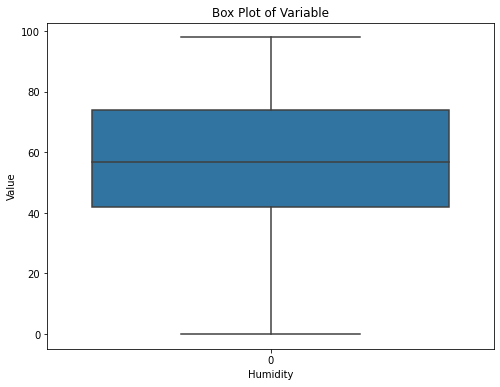

In [17]:
# Create a box plot of the variable
plt.figure(figsize=(8, 6))
sns.boxplot(df['Humidity'])
plt.xlabel('Humidity')
plt.ylabel('Value')
plt.title('Box Plot of Variable')
plt.show()

#### The box plot shows a relatively symmetrical distribution without extreme outliers

In [18]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Humidity'] < lower_bound) | (df['Humidity'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 0


1. In this case, the output shows that there are 0 outliers identified. This means that none of the 'Humidity' values fall below the lower bound or above the upper bound defined by the 1.5*IQR rule.
2. A count of 0 outliers suggests that the 'Humidity' values in your dataset are within a reasonable range and do not exhibit extreme deviations from the majority of the data. 
3. Hence, use mean imputation!

4. Further analysis using histogram

In [19]:
from scipy.stats import skew

# Calculate skewness of 'Humidity' column ignoring missing values
skewness = skew(df['Humidity'].dropna())

print("Skewness of 'Humidity' column:", skewness)


Skewness of 'Humidity' column: 0.059430012209316874


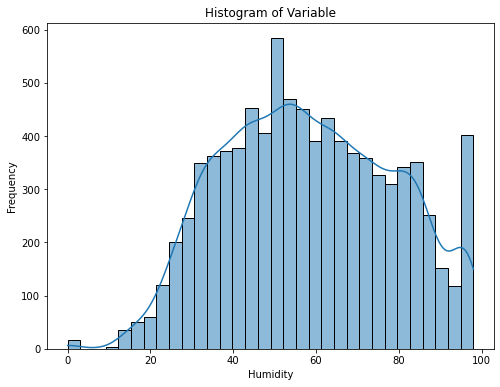

In [20]:
# Create a histogram of the variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Humidity'], kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Variable')
plt.show()

1. Since the skewness value in your case is close to zero, it suggests that the 'Humidity' variable has a relatively symmetric distribution, with a minor tendency towards right-skewness.
### Confirm use mean imputation!!!

In [21]:
# Calculate the mean of the 'Humidity' column
mean_humidity = df['Humidity'].mean()

# Fill missing values with the mean
df['Humidity'] = df['Humidity'].fillna(mean_humidity)

In [22]:
df.isnull().sum()

S/N                   0
Date                  0
Country               0
Rented_Bike_Count     0
Hour                  0
Temperature           0
Humidity              0
Windspeed             0
Visibility            0
Dewpoint_Temp         0
Solar_Radiation       0
Rainfall              0
Snowfall             12
Open                  0
Hit_Sales            20
Region                0
Latitude              0
Longitude             0
dtype: int64

In [23]:
df.describe()

,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4382.000000,708.084828,11.490129,13.147107,58.238601,1.724649,3.725436,4.074027,0.568916,0.148636,37.505406,127.996172
std,2529.804538,736.580541,6.927461,13.550422,20.348650,1.036229,1.070309,13.060726,0.868661,1.128003,0.287705,0.290047
min,1.000000,-2.000000,0.000000,-44.500000,0.000000,0.000000,1.000000,-30.600000,0.000000,0.000000,37.000169,127.500077
25%,2191.500000,192.000000,5.000000,3.400000,42.000000,0.900000,3.000000,-4.700000,0.000000,0.000000,37.261747,127.749186
50%,4382.000000,506.000000,11.000000,13.800000,57.000000,1.500000,4.000000,5.100000,0.010000,0.000000,37.506158,127.995693
75%,6572.500000,1064.500000,17.000000,22.600000,74.000000,2.300000,5.000000,14.800000,0.930000,0.000000,37.758616,128.248434
max,8763.000000,34180.000000,23.000000,166.600000,98.000000,7.400000,5.000000,27.200000,3.520000,35.000000,37.999835,128.499946


In [24]:
from scipy.stats import skew

# Calculate skewness of the variable
skewness = skew(df['Humidity'])
print("Skewness:", skewness)

Skewness: 0.05947074560149407


1. Since the skewness did not change significantly after handling the missing values, it indicates that the missing data treatment did not alter the overall shape or skewness of the variable's distribution that much. This can be considered a desirable outcome as it indicates that the imputation process did not introduce any substantial bias to the data.

# Snowfall

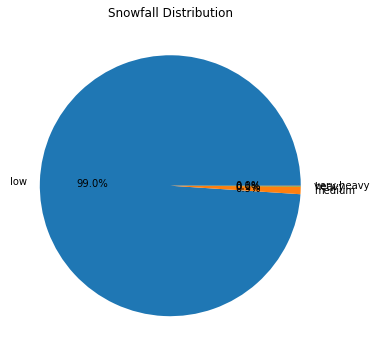

In [25]:

# Calculate the count of unique values in the 'Snowfall' column
snowfall_counts = df['Snowfall'].value_counts()

# Extract the labels and values from the counts
labels = snowfall_counts.index.tolist()
values = snowfall_counts.values.tolist()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Snowfall Distribution')

# Display the chart
plt.show()



In [26]:

# Calculate the count and percentage of unique values in the 'Snowfall' column
snowfall_counts = df['Snowfall'].value_counts()
snowfall_percentages = df['Snowfall'].value_counts(normalize=True) * 100

# Create a table with the values and percentages
snowfall_table = pd.DataFrame({'Snowfall': snowfall_counts, 'Percentage': snowfall_percentages})

# Display the table
print(snowfall_table)


            Snowfall  Percentage
low             8660   98.960119
medium            83    0.948463
heavy              6    0.068564
very heavy         2    0.022855


1. 'Snowfall' is a categorical column with discrete categories like "low," "medium," "heavy," etc., mode imputation would be more suitable. 
2. By imputing the missing values with the mode, i am assuming that the missing values are likely to belong to the most common category observed in the dataset.
3. Mode imputation is specifically suitable for categorical or discrete variables where there is no inherent order or numerical relationship between the categories. It provides a way to fill in missing values while maintaining the categorical nature of the variable.
#### Hence use mode imputation

In [27]:
# Calculate the mode of the 'Snowfall' column
mode_value = df['Snowfall'].mode()[0]

# Replace missing values with the mode
df['Snowfall'].fillna(mode_value, inplace=True)


# Hit_Sales

Based on the relationship between the 'rented_bike_count' and 'Hit_Sales' columns, it seems like the 'Hit_Sales' column can be determined based on a specific condition related to the 'rented_bike_count' values. In this case,  a conditional imputation method can be used to fill in the missing values in the 'Hit_Sales' column.

In [28]:
# Example: Chi-square test
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Rented_Bike_Count'], df['Hit_Sales'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print('Chi-square p-value:', p_value)



Chi-square p-value: 0.0


1. A chi-square p-value of 0.0 indicates that the observed relationship between the 'Rented_Bike_Count' and 'Hit_Sales' variables is statistically significant. In hypothesis testing, the p-value represents the probability of obtaining the observed data or more extreme results if the null hypothesis is true. A p-value of 0.0 essentially means that the probability of observing such a strong relationship between the variables under the null hypothesis is extremely low.

2. In this context, a low p-value suggests that there is evidence to reject the null hypothesis, which assumes no relationship between the variables. Therefore, we can conclude that there is a statistically significant relationship between 'Rented_Bike_Count' and 'Hit_Sales'. 

In [29]:
# Impute missing values in 'Hit_Sales' based on the condition
df.loc[(df['Rented_Bike_Count'] > 1000) & (df['Hit_Sales'].isnull()), 'Hit_Sales'] = 'Y'
df.loc[(df['Rented_Bike_Count'] <= 1000) & (df['Hit_Sales'].isnull()), 'Hit_Sales'] = 'N'

## <font color= grey> Data Transformation (also known as Features Engineering)

<div class="alert alert-block alert-danger">
<b>1. Log transformation on Rainfall <br>
    <br>
   Decision: Decline<br>
    <br>
   Reason: I wanted to use Log transformation (chatGPT suggested technique) for the rainfall column. At first, i did plan on using log transforamtion. As for log transformation to work, the data of my column 'Raainfall' should be positively skewed and when i plotted my column, it indeed was positively skewed. ChatGPT said it can help in reducing the magnitude of extreme values, narrowing the spread of the distribution, and making it more symmetric or closer to a normal distribution. Hence, i wanted to use it. However, my rainfall column contains alot of zero's. </b> 

</div>



<div class="alert alert-block alert-success">
<b>2. Conditional Transformation or Value Mapping Transformation on Rainfall<br>
    <br>
   Decision: Approved <br>
    <br>
   Reason: As per the suggestion, i decided to use conditional transformation instead of log transformation as i realised i just need to know if there was rainfall or not. The amount of rainfall does not really matter. As i find that if i want to know if rainfall affects the number of bike rentals, i do not need to know the amount of rainfall. Hence, i just need to know if it rains or if it does not. This will help me in modelling when i want to find out if rainfall as one of the variable affects the number of rentals </b> 
</div>



<div class="alert alert-block alert-warning">
<b>3. Encoding for columns like 'Open', 'Hit_Sales' and 'Snowfall'<br>
    <br>
   Decision: Pending<br>
    <br>
   Reason: According to chatGPT, encoding is also a data transforamtion technique. I actually wanted to use it as well but i realised that encoding will be done in data modelling as well. Hence, i decided not to use it for now as modelling is for Part II and not for part I.  </b> 
</div>

Provide the description of how you have used ChatGPT or other internet sources to brainstorm for ideas. 

# Tranformation 1

Provide the description, justification and results of your technique(s) here.

To see if there are any extreme values or outliers in any of the columns

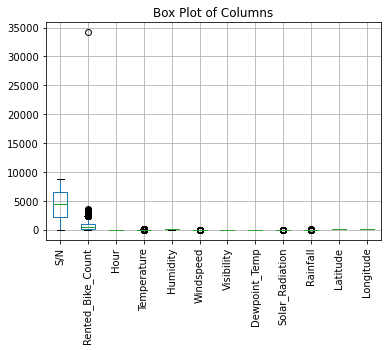

In [30]:

# Create box plots for each column
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Columns')
plt.show()


There is a extreme value for 'Rented_Bike_Count'

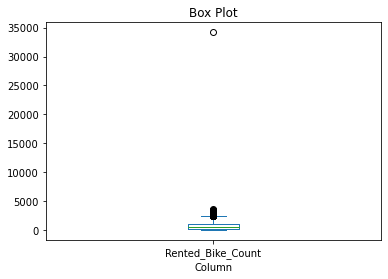

In [31]:
# to look it up closer
# Create a box plot for a single column using pandas
df['Rented_Bike_Count'].plot.box()
plt.xlabel('Column')
plt.title('Box Plot')
plt.show()


In [32]:
# using IQR to look for values are considered to be extreme values

# Calculate the interquartile range (IQR)
Q1 = df['Rented_Bike_Count'].quantile(0.25)
Q3 = df['Rented_Bike_Count'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 1.5  # Adjust this value based on your requirements

# Identify potential outliers using the IQR method
lower_bound = Q1 - (outlier_threshold * IQR)
upper_bound = Q3 + (outlier_threshold * IQR)
outliers = df[(df['Rented_Bike_Count'] < lower_bound) | (df['Rented_Bike_Count'] > upper_bound)]

# Display the outliers
print(outliers)

# min value: -2
# max value: 34180

       S/N        Date Country  Rented_Bike_Count  Hour  Temperature  \
2947  2948    4/2/2019      JP             2401.0  18.0         20.7   
2995  2996    4/4/2019      JP             2402.0  18.0         16.0   
3115  3116    4/9/2019      JP             2401.0  18.0         14.8   
3211  3212   4/13/2019      JP             2404.0  18.0         17.5   
3283  3284   4/16/2019      JP             2692.0  18.0         17.0   
...    ...         ...     ...                ...   ...          ...   
7724  7725  10/19/2019      JP             2631.0  18.0         16.6   
7820  7821  10/23/2019      JP             2415.0  18.0         14.5   
7844  7845  10/24/2019      JP             2612.0  18.0         15.1   
7868  7869  10/25/2019      JP             2632.0  18.0         17.3   
8757  8758   12/1/2019      JP             2613.0  18.0         17.3   

      Humidity  Windspeed  Visibility  Dewpoint_Temp  Solar_Radiation  \
2947      54.0        4.1           4           11.0          

In [33]:
# usinng z-score to look for values are considered to be extreme values

# Calculate the Z-scores for each data point in the column
z_scores = (df['Rented_Bike_Count'] - df['Rented_Bike_Count'].mean()) / df['Rented_Bike_Count'].std()

# Define the threshold for identifying outliers based on Z-scores
z_score_threshold = 3  # Adjust this value based on your requirements

# Identify potential outliers using Z-scores
outliers = df[np.abs(z_scores) > z_score_threshold]

# Display the outliers
print(outliers)


       S/N       Date Country  Rented_Bike_Count  Hour  Temperature  Humidity  \
3836  3837   5/9/2019      JP             3130.0  18.0         20.6      41.0   
4124  4125  5/21/2019      JP             3069.0  18.0         21.6      48.0   
4172  4173  5/23/2019      JP             3123.0  18.0         21.7      40.0   
4292  4293  5/28/2019      JP             3245.0  18.0         26.0      39.0   
4340  4341  5/30/2019      JP             3251.0  18.0         23.6      42.0   
4364  4365  5/31/2019      JP             3119.0  18.0         26.4      42.0   
4388  4389   6/1/2019      JP             3088.0  18.0         28.5      36.0   
4460  4461   6/4/2019      JP             3380.0  18.0         24.4      48.0   
4484  4485   6/5/2019      JP             3227.0  18.0         27.1      40.0   
4532  4533   6/7/2019      JP             3221.0  18.0         25.6      57.0   
4556  4557   6/8/2019      JP             3309.0  18.0         26.2      54.0   
4652  4653  6/12/2019      J

1. As you can see from above that there are alot of extreme values and outliers present in the the column 'Rented_Bike_Count'. Hence, binning can be used to bin all the extreme values which makes it easier to interpret values in future step such as modelling.

### Binning Rented_Bike_Count

In [34]:

# Define the bin ranges
bins = [-float('inf'), 0, 500, 1000, 2000, 3000, 4000, 5000, float('inf')]

# Create a new column with the binned values
df['Binned_Rented_Bike_Count'] = pd.cut(df['Rented_Bike_Count'], bins=bins,
                                        labels=['<0', '0-500', '501-1000', '1001-2000',
                                                '2001-3000', '3001-4000', '4001-5000', '>5001'])

# Display the binned values
print(df[['Rented_Bike_Count', 'Binned_Rented_Bike_Count']].tail())


      Rented_Bike_Count Binned_Rented_Bike_Count
8758             1860.0                1001-2000
8759             1593.0                1001-2000
8760             1513.0                1001-2000
8761             1360.0                1001-2000
8762              916.0                 501-1000


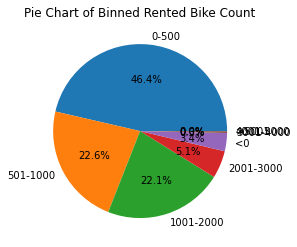

In [35]:


# Calculate the value counts of each bin category
bin_counts = df['Binned_Rented_Bike_Count'].value_counts()

# Create a pie chart
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Binned Rented Bike Count')

plt.show()


In [36]:
# Calculate the count and percentage of unique values in the 'Snowfall' column
bike_counts = df['Binned_Rented_Bike_Count'].value_counts()
bike_percentages = df['Binned_Rented_Bike_Count'].value_counts(normalize=True) * 100

# Create a table with the values and percentages
bike_table = pd.DataFrame({'Binned_Rented_Bike_Count': bike_counts, 'Percentage': bike_percentages})

# Display the table
print(bike_table)


           Binned_Rented_Bike_Count  Percentage
0-500                          4065   46.388223
501-1000                       1984   22.640648
1001-2000                      1939   22.127125
2001-3000                       448    5.112404
<0                              296    3.377839
3001-4000                        30    0.342349
>5001                             1    0.011412
4001-5000                         0    0.000000


# Tranformation 2 

Provide the description, justification and results of your technique(s) here.

In [37]:
# Insert your codes here to generate the result.

### Conditional Transformation / Value Mapping Transformation.

In [38]:

# Assuming 'rainfall' is the name of the column in your DataFrame
df['rainfall_transformed'] = df['Rainfall'].apply(lambda x: 'No' if x == 0 else 'Yes')


In [39]:
df

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude,Binned_Rented_Bike_Count,rainfall_transformed
0,1,11/23/2018,JP,196.0,0.0,-1.7,79.0,0.5,3,-4.8,0.0,0.0,low,Yes,N,South,37.453024,127.718234,0-500,No
1,2,11/23/2018,JP,250.0,1.0,-1.6,79.0,0.6,3,-4.7,0.0,0.0,low,Yes,N,South,37.805615,127.766506,0-500,No
2,3,11/23/2018,JP,161.0,2.0,-1.1,79.0,0.7,3,-4.2,0.0,0.0,low,Yes,N,South,37.276916,127.736311,0-500,No
3,4,11/23/2018,JP,99.0,3.0,-0.6,76.0,0.5,3,-4.3,0.0,0.0,low,Yes,N,South,37.416781,128.262240,0-500,No
4,5,11/23/2018,JP,64.0,4.0,-0.3,76.0,0.9,3,-4.0,0.0,0.0,low,Yes,N,South,37.377350,127.895479,0-500,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8759,12/1/2019,JP,1860.0,19.0,15.6,44.0,1.5,3,3.3,0.0,0.0,low,Yes,Y,South,37.858219,128.236174,1001-2000,No
8759,8760,12/1/2019,JP,1593.0,20.0,14.5,51.0,1.4,3,4.4,0.0,0.0,low,Yes,Y,South,37.088738,127.732059,1001-2000,No
8760,8761,12/1/2019,JP,1513.0,21.0,13.4,56.0,0.7,3,4.7,0.0,0.0,low,Yes,Y,South,37.623679,128.075040,1001-2000,No
8761,8762,12/1/2019,JP,1360.0,22.0,12.7,60.0,0.0,2,5.1,0.0,0.0,low,Yes,Y,South,37.641870,128.197566,1001-2000,No


1. Mapping the values of 0mm in the rainfall column to "No" (indicating no rainfall) and mapping other non-zero values (e.g., 71mm, 2mm) to "Yes" (indicating rainfall).

2. This type of transformation involves mapping specific values or ranges of values in a column to new values based on predefined conditions or criteria. It allows you to modify the data based on certain rules or logic to make it more suitable for analysis or modeling.

3. The lambda function checks if the value is 0, and if so, assigns "No" to the corresponding row in the 'rainfall_transformed' column. Otherwise, it assigns "Yes".

4. After applying this transformation, you will have a new column 'rainfall_transformed' in your DataFrame that represents the rainfall information as either "Yes" or "No" based on the condition you specified.

5. This transformation allows you to represent the presence or absence of rainfall based on the original rainfall values, making it easier to interpret and analyze the data in the context of rainfall events.

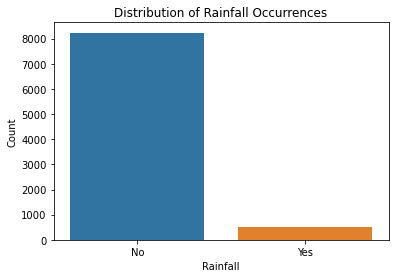

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rainfall_transformed' is the name of the transformed column
sns.countplot(data=df, x='rainfall_transformed')

plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.title('Distribution of Rainfall Occurrences')
plt.show()


##### By visually comparing the bars, you can observe the impact of the conditional transformation and assess the distribution of rainfall occurrences more intuitively.

##### Conditional transformation can be helpful in downstream analysis and modeling for understanding the relationship between rainfall and the number of bike rentals. By transforming the rainfall attribute into a binary variable indicating the presence or absence of rainfall, you can explore the impact of rainfall on bike rentals in a more interpretable and intuitive manner. Here's how conditional transformation can aid in downstream analysis and modeling:

1. Analyzing Rainfall Influence: With the transformed binary rainfall variable, you can examine the differences in bike rentals during periods of rainfall (Yes) versus periods of no rainfall (No). This allows for a direct comparison of rental patterns in both scenarios, providing insights into how rainfall affects customer behaviors.

2. Feature Importance: In predictive modeling, the transformed rainfall variable can serve as an important predictor for estimating bike rentals. By including this binary variable in your model, you can determine its significance in predicting rental demand. It helps answer questions such as whether rainfall has a positive or negative impact on bike rentals, and the magnitude of this impact.

3. Interaction Effects: You can explore interaction effects between rainfall and other factors in your dataset. For example, you may investigate how the relationship between rainfall and bike rentals differs across different regions (North, South, East, West, Central). This allows you to uncover regional variations in the impact of rainfall on rentals.



# Data Transformation 3

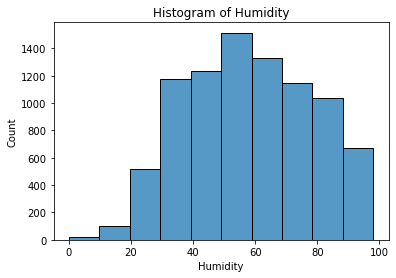

In [41]:
sns.histplot(data=df, x='Humidity', bins=10)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Histogram of Humidity')
plt.show()

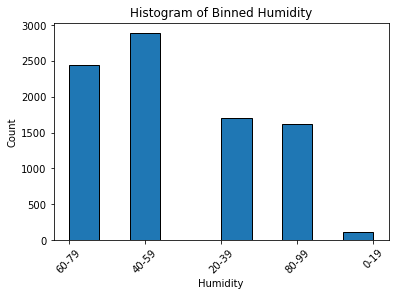

In [42]:
# Define the bin edges
bins = [0, 19, 39, 59, 79, 99]

# Create the bin labels
labels = ['0-19', '20-39', '40-59', '60-79', '80-99']

# Bin the 'Humidity' column
df['Humidity_bins'] = pd.cut(df['Humidity'], bins=bins, labels=labels, include_lowest=True)

# Plot the histogram
plt.hist(df['Humidity_bins'], edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Histogram of Binned Humidity')
plt.xticks(rotation=45)
plt.show()


##### Binning the 'Humidity' column into specific ranges can help in the downstream analysis and/or modeling in several ways:

1. Data Understanding: Binning allows you to gain a better understanding of the distribution of humidity values in the dataset. By grouping humidity values into meaningful ranges, you can visualize the frequency or count of observations within each bin. This provides insights into the distribution of humidity levels and helps identify any patterns or concentrations in certain ranges.

2. Feature Engineering: Binned variables can be treated as categorical variables and used as additional features in your analysis or modeling. The binned 'Humidity' column can serve as a discrete feature that captures different levels of humidity. This can be beneficial for certain machine learning algorithms that work well with categorical or ordinal variables.

# Data Transformation 4

In [43]:
# Create a dictionary to define the bin ranges
bin_ranges = {
    (6, 11): 'Morning',
    (12, 17): 'Afternoon',
    (18, 21): 'Evening',
    (22, 23): 'Night',
    (0, 5): 'Night'
}

# Function to assign the bin labels based on the hour value
def assign_bin_label(hour):
    for range_, label in bin_ranges.items():
        if range_[0] <= hour <= range_[1]:
            return label

# Create a new 'Time_of_Rental' column based on the 'Hour' column
df['Time_of_Rental'] = df['Hour'].apply(assign_bin_label)

# Print the updated DataFrame
print(df[['Hour', 'Time_of_Rental']])


      Hour Time_of_Rental
0      0.0          Night
1      1.0          Night
2      2.0          Night
3      3.0          Night
4      4.0          Night
...    ...            ...
8758  19.0        Evening
8759  20.0        Evening
8760  21.0        Evening
8761  22.0          Night
8762  23.0          Night

[8763 rows x 2 columns]


1. By binning the 'Hour' variable into morning, afternoon, evening, and night, it can help in understanding the relationship between these time periods and other variables such as 'Rented_Bike_Count'. By analyzing the binned 'Hour' variable, you can observe if there are any specific time periods (e.g., mornings or evenings) that have higher bike rental demand compared to others.

# Data Transformation 5

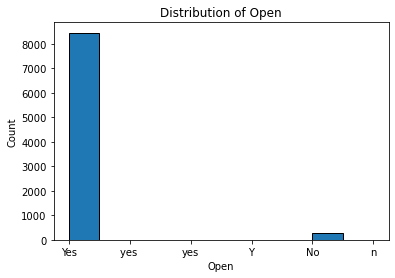

In [44]:
plt.hist(df['Open'], edgecolor='black')

# Set the x-axis label
plt.xlabel('Open')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the histogram
plt.title('Distribution of Open')

# Display the histogram
plt.show()


In [45]:
# Calculate the count of each value in the 'Open' column
open_count = df['Open'].value_counts()

# Create a DataFrame from the count values
open_count_table = pd.DataFrame({'Open': open_count.index, 'Count': open_count.values})

# Display the table
print(open_count_table)


   Open  Count
0   Yes   8458
1    No    290
2     n      5
3   yes      4
4     Y      4
5  yes       2


- For the Open column, there should only be two values. According to the data dictionary, Open: Whether the company is opened in binary value: Yes or No. However, in our dataframe, instead of having the values 'Yes', there are values like 'yes','Y' instead. Moreover, there are values that are written as 'n' instead of 'No'. Hence, value replacement or value mapping should be done.

### Value replacement or Value mapping

In [46]:
# Replace 'yes' with 'Yes', 'Y' with 'Yes', and 'n' with 'No' in the 'Open' column
df['Open'] = df['Open'].replace({'yes': 'Yes','yes ':'Yes', 'Y': 'Yes', 'n': 'No'})


In [47]:
# Calculate the count of each value in the 'Open' column
open_count = df['Open'].value_counts()

# Create a DataFrame from the count values
open_count_table = pd.DataFrame({'Open': open_count.index, 'Count': open_count.values})

# Display the table
print(open_count_table)


  Open  Count
0  Yes   8468
1   No    295


#### so now there are only two values!

## <font color= grey> Pearson's Correlation Analysis

Provide the description, justification and results of your technique(s) here.

In [48]:
# Insert your codes here to generate the result.

In [49]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
round(correlation_matrix,2)

correlation_matrix.style.bar(color ='pink')


,S/N,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
S/N,1.000000,0.300239,0.001447,0.540387,0.166996,-0.156943,0.122399,0.560785,0.092013,0.038223,-0.003285,0.014567
Rented_Bike_Count,0.300239,1.000000,0.363166,0.431200,-0.178459,0.111869,0.176234,0.335910,0.233370,-0.108261,0.008931,0.004039
Hour,0.001447,0.363166,1.000000,0.106397,-0.241355,0.284578,0.089481,0.002060,0.144044,0.008895,-0.002103,0.001825
Temperature,0.540387,0.431200,0.106397,1.000000,0.144462,-0.019509,0.043929,0.810865,0.309187,0.048525,0.015075,0.013806
Humidity,0.166996,-0.178459,-0.241355,0.144462,1.000000,-0.336099,-0.497809,0.536214,-0.461592,0.236435,-0.000417,-0.001351
Windspeed,-0.156943,0.111869,0.284578,-0.019509,-0.336099,1.000000,0.129310,-0.176456,0.332380,-0.019639,0.001062,0.012797
Visibility,0.122399,0.176234,0.089481,0.043929,-0.497809,0.129310,1.000000,-0.152395,0.083055,-0.171602,-0.007683,0.001715
Dewpoint_Temp,0.560785,0.335910,0.002060,0.810865,0.536214,-0.176456,-0.152395,1.000000,0.094345,0.125569,0.005379,0.006926
Solar_Radiation,0.092013,0.233370,0.144044,0.309187,-0.461592,0.332380,0.083055,0.094345,1.000000,-0.074255,-0.006110,0.004527
Rainfall,0.038223,-0.108261,0.008895,0.048525,0.236435,-0.019639,-0.171602,0.125569,-0.074255,1.000000,-0.015710,-0.007187


1. Which columns are highly correlated?
- Rented_Bike_Count and Temperature (0.431)
- Hour and Rented_Bike_Count (0.363)
- Temperature and Dewpoint_Temp (0.811)
- Humidity and Dewpoint_Temp (0.536)
- Windspeed and Humidity (-0.336)
- Visibility and Humidity (-0.498)
- Solar_Radiation and Humidity (-0.461)
- Rainfall and Humidity (0.236)
- Latitude and Temperature (0.015)
- Longitude and Temperature (0.014)

2. All in all Temperature and Dewpoint_Temp has the higgest correlation as compared to other columns

## <font color= grey> Other Method(s) = Heatmap

Provide the description, justification and results of your technique(s) here.

In [50]:
# Insert your codes here to generate the result.

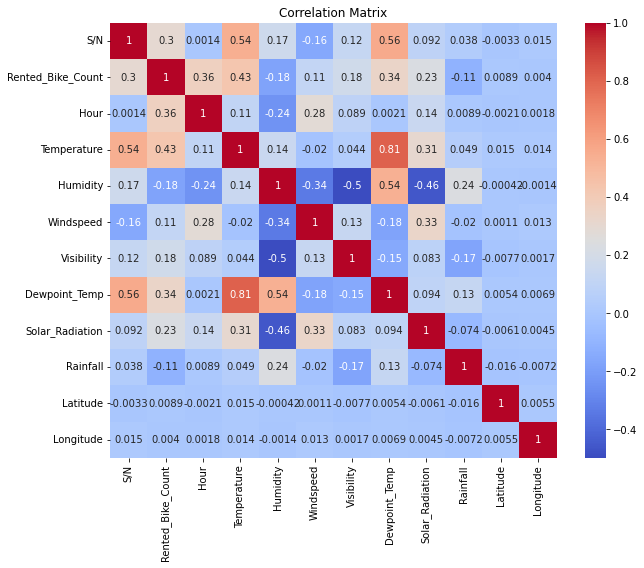

In [51]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()


# <font color= maroon> Data Understanding using EDA

### Take-Away 1

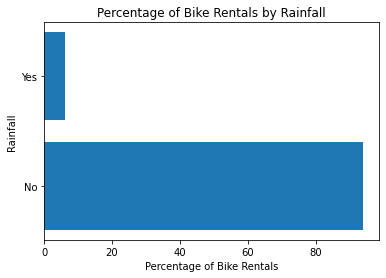

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Rainfall' and calculate the total count of bike rentals for each category
rentals_count = df.groupby('rainfall_transformed')['Rented_Bike_Count'].count()

# Calculate the total count of bike rentals across all categories
total_rentals = rentals_count.sum()

# Calculate the percentage of bike rentals for each category
rentals_percentage = (rentals_count / total_rentals) * 100

# Sort the data in descending order based on the percentage of rentals
rentals_percentage = rentals_percentage.sort_values(ascending=False)

# Create a horizontal bar chart
plt.barh(rentals_percentage.index, rentals_percentage)
plt.xlabel('Percentage of Bike Rentals')
plt.ylabel('Rainfall')
plt.title('Percentage of Bike Rentals by Rainfall')

plt.show()


- Percentage of bike rentals when there is rainfall is relatively low (less than 10%) as compared to when there is no rainfall. This shows that the number of rentals when there is no rainfall has a high demand.

### Take-Away 2

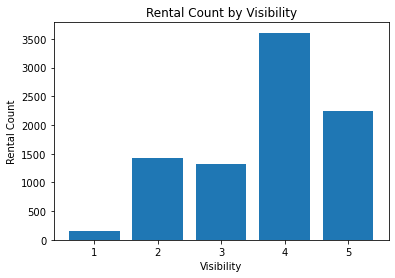

In [53]:
import matplotlib.pyplot as plt

# Group the data by visibility levels and calculate the count of rental occurrences
visibility_rental_counts = df['Visibility'].value_counts()

# Create a bar chart
plt.bar(visibility_rental_counts.index, visibility_rental_counts.values)

# Set the labels and title
plt.xlabel('Visibility')
plt.ylabel('Rental Count')
plt.title('Rental Count by Visibility')

# Display the chart
plt.show()


- According to the data dictionary, visibility is shown in terms of ordinal value. 1 (being most visible) to 5 (being barely visible). The bar chart shows that, the number of rentals when it is barely visible (4 & 5) is higher than when it is most visible (1 & 2). 

### Take-Away 3

C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\1893138791.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


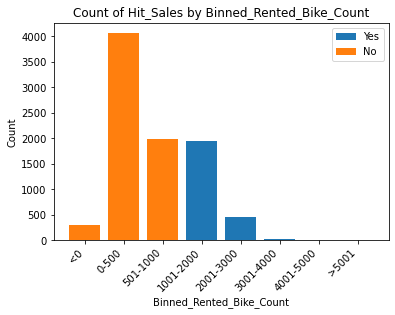

In [54]:
# Calculate the count of occurrences for each bin of Binned_Rented_Bike_Count and Hit_Sales combination
count_table = df.groupby(['Binned_Rented_Bike_Count', 'Hit_Sales']).size().unstack()

# Set the bin labels for the x-axis
labels = count_table.index

# Get the count of occurrences for 'Yes' and 'No' in each bin
yes_counts = count_table['Y']
no_counts = count_table['N']

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(labels, yes_counts, label='Yes')
ax.bar(labels, no_counts, bottom=yes_counts, label='No')

# Set the axis labels and title
ax.set_xlabel('Binned_Rented_Bike_Count')
ax.set_ylabel('Count')
ax.set_title('Count of Hit_Sales by Binned_Rented_Bike_Count')

# Rotate and align the x-axis labels
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add a legend
ax.legend()

# Show the plot
plt.show()


- The bar chart shows that rentals only above 1000 is considered as Hit Sales. Anything below 1000 is considered not a hit. So for example, if the number of bike rentals is anywhere between 0-500, the Hit_Sales column will indicate No. 

### Take-Away 4

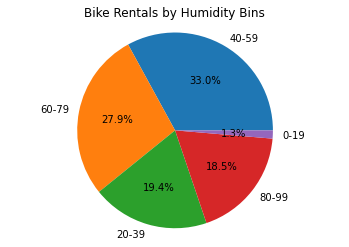

In [55]:
# Count the number of rentals in each humidity bin
rentals_by_humidity = df['Humidity_bins'].value_counts()

# Plot the pie chart
plt.pie(rentals_by_humidity, labels=rentals_by_humidity.index, autopct='%1.1f%%')
plt.title('Bike Rentals by Humidity Bins')
plt.axis('equal')
plt.show()

1. The lowest percentages of rentals were observed at the extreme ends of the humidity spectrum. The lowest percentage (1.3%) occurred when the humidity was in the range of 0-19%, while the second lowest percentage (18.5%) occurred in the range of 80-99%. This suggests that both very low and very high humidity levels may have a negative impact on bike rentals.

2. The highest percentage of bike rentals (33.0%) occurred when the humidity was in the range of 40-59%. This suggests that moderate humidity levels are favorable for bike rentals.

3. The second highest percentage of rentals (27.9%) occurred when the humidity was in the range of 60-79%. This indicates that humidity levels within this range are still conducive to bike rentals.

### Take-Away 5

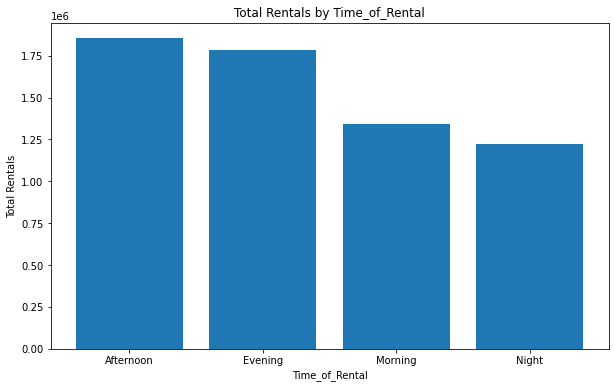

In [56]:
import matplotlib.pyplot as plt

# Calculate the sum of rentals for each time period
rentals_by_time = df.groupby('Time_of_Rental')['Rented_Bike_Count'].sum()

# Plot the rentals by time
plt.figure(figsize=(10, 6))

plt.bar(rentals_by_time.index, rentals_by_time.values)
plt.xlabel('Time_of_Rental')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Time_of_Rental')
plt.show()

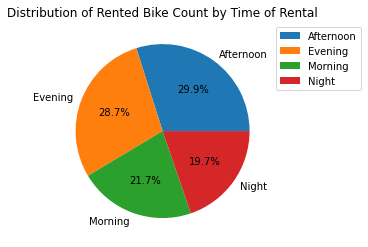

In [57]:
import matplotlib.pyplot as plt

# Calculate the sum of 'Rented_Bike_Count' for each category of 'Time_of_Rental'
rented_bike_count_sum = df.groupby('Time_of_Rental')['Rented_Bike_Count'].sum()

# Create a pie chart
plt.pie(rented_bike_count_sum, labels=rented_bike_count_sum.index, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Rented Bike Count by Time of Rental')

# Display the legend outside the chart
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the chart
plt.show()



- According to both charts which is supposed indicate the same idea, shows that afternoon has the highest distribution of number of bike rentals followed by evening. 

### Take-Away 6

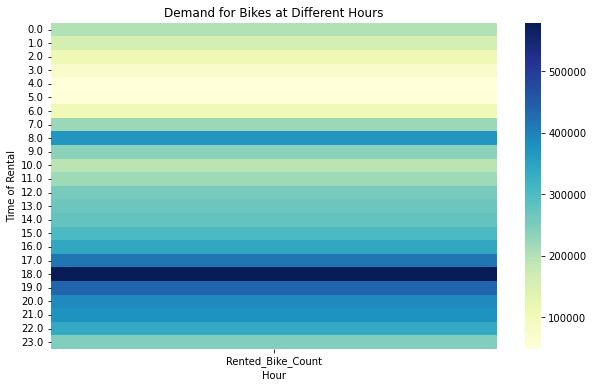

In [58]:

# Create a pivot table with Time_of_Rental as rows, Hour as columns, and Rented_Bike_Count as values
pivot_table = df.pivot_table(index='Hour', values='Rented_Bike_Count', aggfunc='sum')

# Set the size of the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(pivot_table, cmap='YlGnBu')

# Set the title and axis labels
plt.title('Demand for Bikes at Different Hours')
plt.xlabel('Hour')
plt.ylabel('Time of Rental')

# Display the heatmap
plt.show()


- The number of bike rentals at the hour 18.0 has the highest count. So 18.0 hour is considered the peak hour.

# <font color= maroon> Data Modelling

Provide the description, justification and results of your technique(s) here.

1. For the regression problem:

The target variable is the variable we want to predict with continuous numerical values. In this case, it would be 'Rented_Bike_Count', which represents the number of bicycle rentals within a particular hour.

2. For the classification problem:

The target variable is the variable we want to predict with categorical values. In this case, it would be 'Hit_Sales', which represents whether the bike rentals resulted in a hit sales or not (Yes or No).

In [59]:
df.drop(columns=["Date", "S/N","Latitude","Humidity","Longitude","Hour","Binned_Rented_Bike_Count", "Country","Rainfall"], inplace=True)
df.head()

,Rented_Bike_Count,Temperature,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Snowfall,Open,Hit_Sales,Region,rainfall_transformed,Humidity_bins,Time_of_Rental
0,196.0,-1.7,0.5,3,-4.8,0.0,low,Yes,N,South,No,60-79,Night
1,250.0,-1.6,0.6,3,-4.7,0.0,low,Yes,N,South,No,60-79,Night
2,161.0,-1.1,0.7,3,-4.2,0.0,low,Yes,N,South,No,60-79,Night
3,99.0,-0.6,0.5,3,-4.3,0.0,low,Yes,N,South,No,60-79,Night
4,64.0,-0.3,0.9,3,-4.0,0.0,low,Yes,N,South,No,60-79,Night


1. Dropped 'Date' column becuase the date seems irrelavant in predicting of number of rentals. As the date does not determine if individuals want to rent bikes or not. Date just represents on what day bikes have been rented.
2. Latitude and longitude has been removed as when i checked the google maps after i have keyed in the latitude and longitude numbers, the rentaals appear to be around the same area. The number range in the dataset for the two columns also was very close to each other and the exact location of the rentals can never affect the number of rentals purchased.
3. Country column was dropped as there was only one unique value among all the rows. This just shows that the bike rentals have been made in the same country and this value will not affect the number of rentals. 
4. I took out Humidity too, as i have binned the humidity values and added another column for it. 
5. Hour column has been dropped as well because the number of rentals for every hour has been recorded which is very uneccessary. We do not need every hour to predict the number of rentals. It only matters if its in the morning, afternoon, evening or night that the number of rentals have been made. Hence, a column has been created for that and the hour column is taken out.
6. I have taken out the Binned_Rented_Bike_Count as well as i realised that the target variable should not be changed in any way. Hence, i have dropped it
7. Rainfall Column has been removed as the amount of rainfall would nt affect the number of rentals. Only whether it has rained or not which will affect the renting of bikes. Hence, removed Rainfall column as there is also rainfall_transformed which indicates whether it has rained or not

#### Regression Modelling

In [60]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np


# Separate features and target variable
X_regression = df.drop(['Rented_Bike_Count'], axis=1)
y_regression = df['Rented_Bike_Count']

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X_regression.select_dtypes(include=['object'])),
                         columns=encoder.get_feature_names(X_regression.select_dtypes(include=['object']).columns))

# Concatenate encoded features with numerical features
X_regression = pd.concat([X_encoded, X_regression.select_dtypes(include=['float64'])], axis=1)

# Split the dataset into training and testing sets for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Define additional regression models with hyperparameter grids
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(),
    
    
}

regression_params = {
    'Linear Regression': {},
    'Random Forest Regressor': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Support Vector Regressor': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree Regressor': {'max_depth': [None, 10, 20]},
    'Gradient Boosting Regressor': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1, 1]},
    'K-Nearest Neighbors Regressor': {'n_neighbors': [3, 5, 7]},
    'MLP Regressor': {'hidden_layer_sizes': [(50,), (100,), (50, 50)]},
}

# Initialize a DataFrame to store model evaluation results
regression_evaluation = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

# Loop through the models and perform grid search with cross-validation
for model_name, model in regression_models.items():
    params = regression_params[model_name]
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_regression, y_train_regression)
    
    best_model = grid_search.best_estimator_
    
    # Evaluate the model on the test set
    y_pred_regression = best_model.predict(X_test_regression)
    mse = mean_squared_error(y_test_regression, y_pred_regression)
    mae = mean_absolute_error(y_test_regression, y_pred_regression)
    r2 = r2_score(y_test_regression, y_pred_regression)
    
    regression_evaluation = regression_evaluation.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }, ignore_index=True)

# Display the regression evaluation results
regression_evaluation

C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\3818689054.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_evaluation = regression_evaluation.append({
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\3818689054.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_evaluation = regression_evaluation.append({
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\3818689054.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

,Model,MSE,MAE,R2
0,Linear Regression,88649.225702,224.727449,0.781305
1,Random Forest Regressor,52801.674772,163.754123,0.86974
2,Support Vector Regressor,92686.31516,217.179073,0.771345
3,Decision Tree Regressor,95428.880237,206.16546,0.764579
4,Gradient Boosting Regressor,59335.41084,176.723752,0.853621
5,Lasso Regression,88647.50359,224.724074,0.781309
6,K-Nearest Neighbors Regressor,85223.694054,196.770741,0.789755
7,MLP Regressor,69327.452448,194.806657,0.828971


<div class="alert alert-block alert-danger">
<b>Encoding PLacement<br>
    <br>
   Decision: Decline<br>
    <br>
   Reason:According to chatgpt, i put encoding before doing my regression and classification modelling. The problem was that while all my regressor models performed well, the classification models  were all of 1.0 in terms of accuracy. So obviously it was considered to be overfitting. Hence i had to tweak it abit such that my model perform well.  </b> 

</div>


#### Encoding

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Separate features and target variable for encoding
X_encoding = df.drop(['Rented_Bike_Count', 'Hit_Sales'], axis=1)

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X_encoding.select_dtypes(include=['object'])),
                         columns=encoder.get_feature_names(X_encoding.select_dtypes(include=['object']).columns))

# Combine encoded features with numerical features
X_encoded = pd.concat([X_encoded, X_encoding.select_dtypes(include=['float64'])], axis=1)


C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Classification Modelling

In [62]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Separate features and target variable for classification
X_classification = X_encoded
y_classification = df['Hit_Sales']

# Split the dataset into training and testing sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Define classification models with hyperparameter grids
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
}

classification_params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree Classifier': {'max_depth': [None, 10, 20]},
    'Random Forest Classifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'Support Vector Classifier': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
}

# Initialize a DataFrame to store classification evaluation results
classification_evaluation = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Confusion Matrix'])

# Loop through the models and perform grid search with cross-validation
for model_name, model in classification_models.items():
    params = classification_params[model_name]
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_classification, y_train_classification)
    
    best_model = grid_search.best_estimator_
    
    # Evaluate the model on the test set
    y_pred_classification = best_model.predict(X_test_classification)
    accuracy = accuracy_score(y_test_classification, y_pred_classification)
    f1 = f1_score(y_test_classification, y_pred_classification, average='weighted')
    cm = confusion_matrix(y_test_classification, y_pred_classification)
    
    classification_evaluation = classification_evaluation.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }, ignore_index=True)

# Display the classification evaluation results
classification_evaluation


C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

,Model,Accuracy,F1 Score,Confusion Matrix
0,Logistic Regression,0.827153,0.818847,"[[1179, 92], [211, 271]]"
1,Decision Tree Classifier,0.86081,0.858345,"[[1174, 97], [147, 335]]"
2,Random Forest Classifier,0.874501,0.868656,"[[1219, 52], [168, 314]]"
3,Gradient Boosting Classifier,0.876212,0.871449,"[[1212, 59], [158, 324]]"
4,Support Vector Classifier,0.868796,0.859924,"[[1234, 37], [193, 289]]"


#### Further Evaluation for regression

C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\1586462487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_results = cross_val_results.append({
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\1586462487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_results = cross_val_results.append({
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\1586462487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_results = cross_val_results.append({
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\1586462487.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cross_val_resul

Cross-Validation Results:
                            Model Fold            MSE         MAE        R2
0               Linear Regression    1   88649.225702  224.727449  0.781305
1               Linear Regression    2   88664.152316  225.754952  0.779814
2               Linear Regression    3   688240.63145   241.99482  0.360418
3               Linear Regression    4   80691.840349  219.002537  0.801558
4               Linear Regression    5   86950.936694  219.590209  0.792653
5         Random Forest Regressor    1   52498.034549  158.881706  0.870489
6         Random Forest Regressor    2   52098.292684  161.862225   0.87062
7         Random Forest Regressor    3  616638.641371  185.945007  0.426957
8         Random Forest Regressor    4  169360.320095  168.118636    0.5835
9         Random Forest Regressor    5    48256.07533   155.28327  0.884926
10       Support Vector Regressor    1   296203.14477  381.371033  0.269274
11       Support Vector Regressor    2  293458.708081  378.842

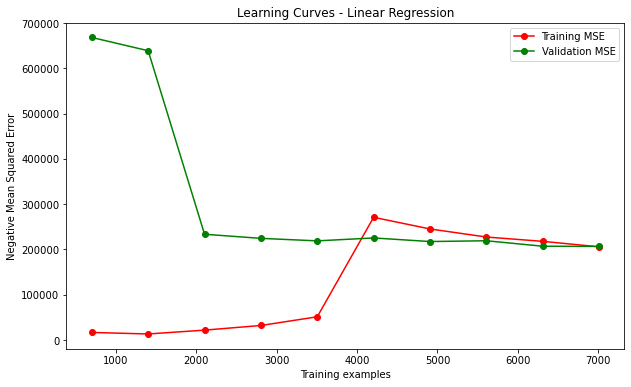

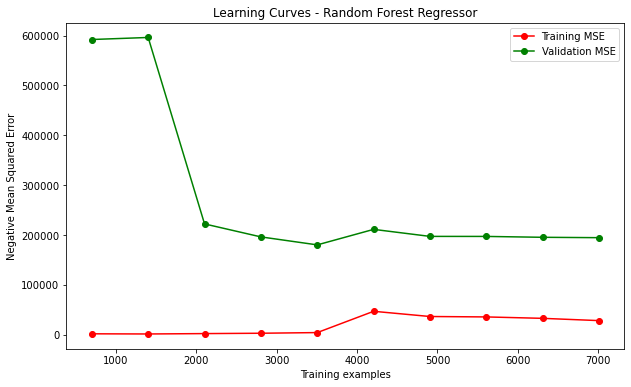

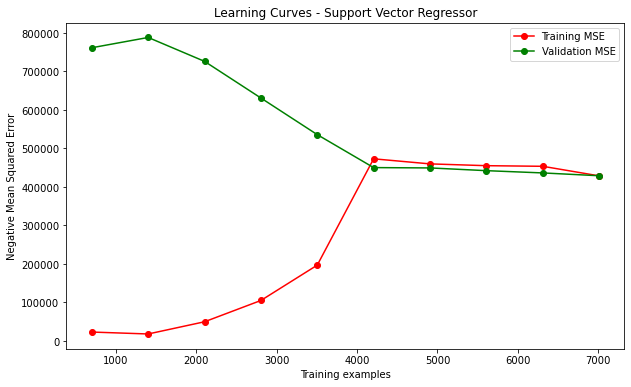

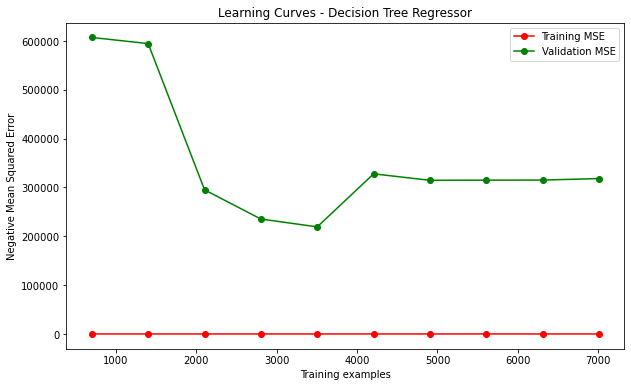

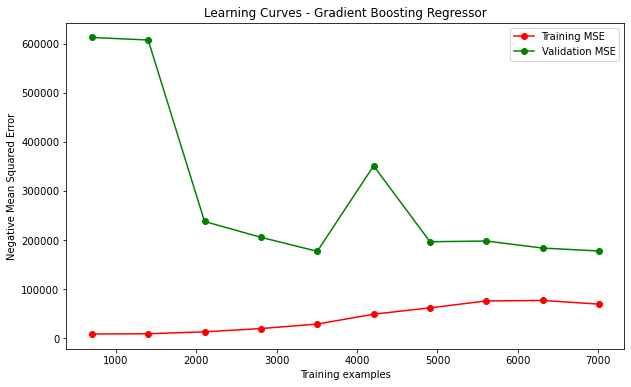

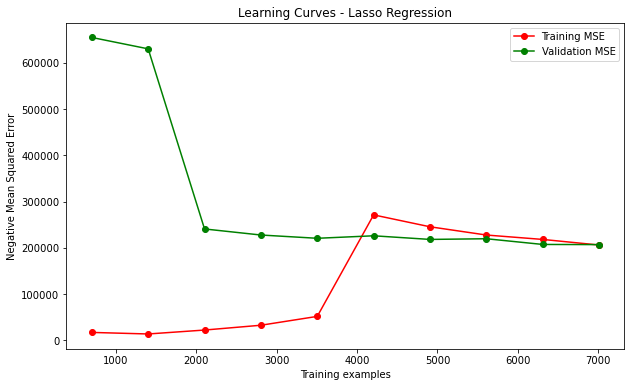

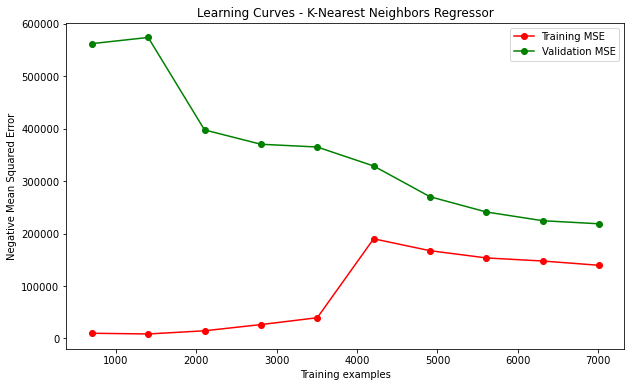

C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alam Rithika\anaconda3\lib\site-pac

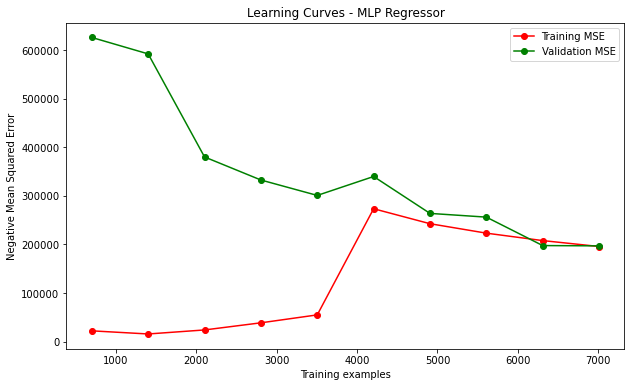

In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the plot_learning_curves function
def plot_learning_curves(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=kf, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training MSE')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation MSE')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title(f'Learning Curves - {model_name}')
    plt.legend(loc='best')
    plt.show()

# Initialize a DataFrame to store cross-validation results
cross_val_results = pd.DataFrame(columns=['Model', 'Fold', 'MSE', 'MAE', 'R2'])

# Perform k-fold cross-validation for each model
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, model in regression_models.items():
    fold = 1
    for train_index, test_index in kf.split(X_regression):
        X_train, X_val = X_regression.iloc[train_index], X_regression.iloc[test_index]
        y_train, y_val = y_regression.iloc[train_index], y_regression.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        
        cross_val_results = cross_val_results.append({
            'Model': model_name,
            'Fold': fold,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }, ignore_index=True)
        
        fold += 1

# Display the cross-validation results
print("Cross-Validation Results:")
print(cross_val_results)

# Generate learning curves for each model
for model_name, model in regression_models.items():
    plot_learning_curves(model, X_regression, y_regression, model_name)


###### According to cross validation results:
1. Linear Regression: It generally has decent performance with reasonable MSE and R2 values. However, there might be some overfitting, as indicated by the higher MSE in the third fold.

2. Random Forest Regressor: It seems to perform well, with relatively low MSE values across most folds. The R2 values also indicate a good fit to the data.

3. Support Vector Regressor: The MSE values are higher, indicating suboptimal performance. The R2 values are relatively low as well.

4. Decision Tree Regressor: The performance varies across folds. Some folds show reasonable performance, while others have high MSE and negative R2, suggesting overfitting.

5. Gradient Boosting Regressor: Generally performs well with low MSE values and high R2 values. However, overfitting may be present in some folds.

6. Lasso Regression: Similar to linear regression, it has decent performance with reasonable MSE and R2 values. Overfitting might be present, as indicated by the higher MSE in the third fold

#### Further evaluation for classification

C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_136152\2744129791.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_cross_val_results = classification_cross_val_results.append({
C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Classification Cross-Validation Results:
                           Model Fold  Accuracy  F1 Score
0            Logistic Regression    1  0.825442  0.820246
1            Logistic Regression    2  0.823731  0.816509
2            Logistic Regression    3  0.825442  0.818209
3            Logistic Regression    4  0.822489  0.815191
4            Logistic Regression    5  0.833333  0.823917
5       Decision Tree Classifier    1  0.832288  0.833018
6       Decision Tree Classifier    2  0.838562  0.839792
7       Decision Tree Classifier    3  0.841985  0.843096
8       Decision Tree Classifier    4  0.828767  0.828321
9       Decision Tree Classifier    5  0.824201  0.823859
10      Random Forest Classifier    1  0.880205  0.877631
11      Random Forest Classifier    2   0.87336  0.870739
12      Random Forest Classifier    3  0.869937  0.866933
13      Random Forest Classifier    4  0.864726  0.860154
14      Random Forest Classifier    5  0.877854  0.875414
15  Gradient Boosting Classifie

C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alam Rithika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

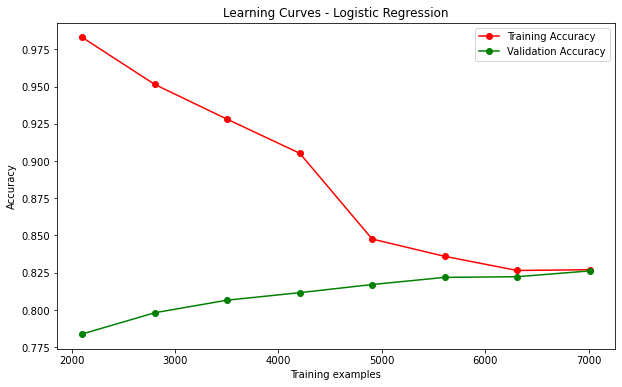

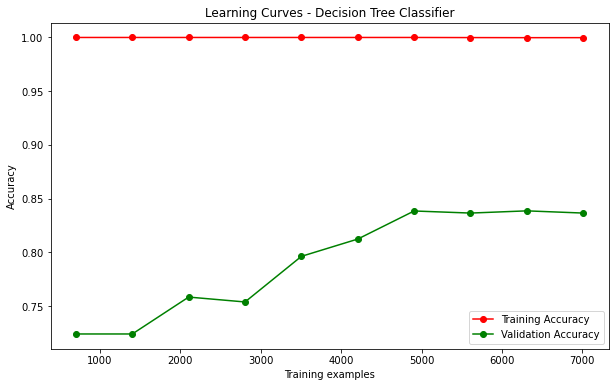

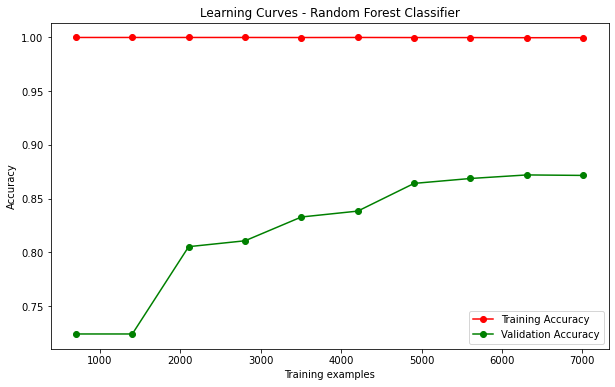

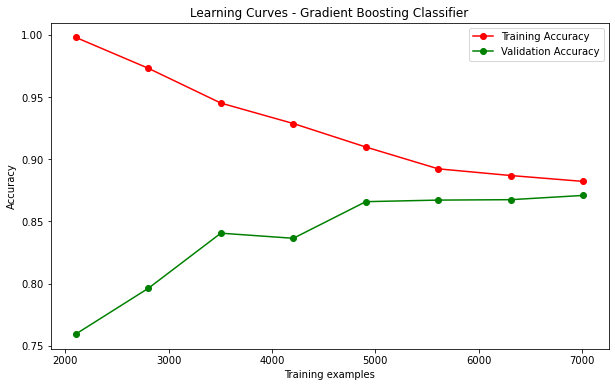

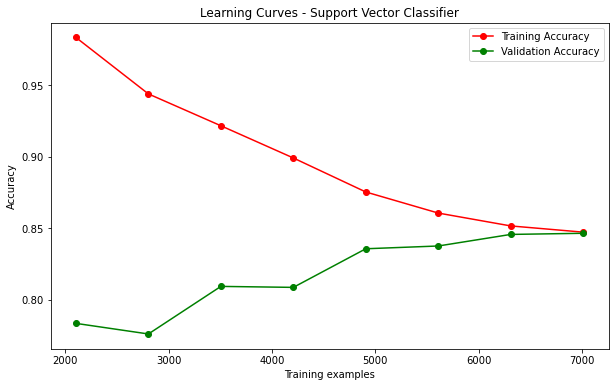

In [64]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Define the plot_learning_curves_classification function
def plot_learning_curves_classification(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=skf, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Accuracy')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curves - {model_name}')
    plt.legend(loc='best')
    plt.show()

# Initialize a DataFrame to store classification cross-validation results
classification_cross_val_results = pd.DataFrame(columns=['Model', 'Fold', 'Accuracy', 'F1 Score'])

# Perform stratified k-fold cross-validation for each classification model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for model_name, model in classification_models.items():
    fold = 1
    for train_index, test_index in skf.split(X_classification, y_classification):
        X_train, X_val = X_classification.iloc[train_index], X_classification.iloc[test_index]
        y_train, y_val = y_classification.iloc[train_index], y_classification.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        classification_cross_val_results = classification_cross_val_results.append({
            'Model': model_name,
            'Fold': fold,
            'Accuracy': accuracy,
            'F1 Score': f1
        }, ignore_index=True)
        
        fold += 1

# Display the classification cross-validation results
print("Classification Cross-Validation Results:")
print(classification_cross_val_results)

# Generate learning curves for each classification model
for model_name, model in classification_models.items():
    plot_learning_curves_classification(model, X_classification, y_classification, model_name)


###### According to cross validation results:
1. Logistic Regression:

- Logistic Regression demonstrates consistent and reasonable performance across different folds, as indicated by the accuracy and F1 score values. The accuracy values range from approximately 0.82 to 0.83, reflecting stable classification accuracy.Similarly, F1 scores show consistency, ranging from around 0.815 to 0.823. Overall, the model performs well and consistently on the classification task.

2. Decision Tree Classifier:

- The Decision Tree Classifier achieves relatively high accuracy and F1 score values, indicating effective classification.Accuracy ranges from about 0.82 to 0.84, highlighting good overall classification performance.F1 scores also exhibit high consistency, ranging from around 0.82 to 0.84. The model appears to perform well across different folds, capturing complex relationships in the data.

3. Random Forest Classifier:

- The Random Forest Classifier demonstrates strong performance with high accuracy and F1 score values. Accuracy ranges from approximately 0.87 to 0.88, showcasing robust classification accuracy. F1 scores also exhibit high consistency, ranging from around 0.87 to 0.88. The model excels in classification tasks, leveraging ensemble techniques for improved generalization.

4. Gradient Boosting Classifier:

- Similar to the Random Forest Classifier, the Gradient Boosting Classifier achieves high and consistent accuracy and F1 score values. Accuracy ranges from about 0.86 to 0.88, indicating reliable classification performance. F1 scores also show high consistency, ranging from around 0.86 to 0.88. The model effectively captures complex patterns in the data and generalizes well.

5. Support Vector Classifier:

- The Support Vector Classifier achieves moderate accuracy and F1 score values, showing reasonably good classification performance. Accuracy ranges from approximately 0.82 to 0.86, with some variability across folds. F1 scores also exhibit variability, ranging from around 0.81 to 0.85. The model performs adequately, but there is some variability in its ability to classify.

1. Best regression model is Random Forest Regressor
2. Best classification model is Random Forest Classifier

### Equation for regression

- In linear regression, the equation relating the target variable to the features can be represented as:
- Rented_Bike_Count = w1 * Feature1 + w2 * Feature2 + ... + wn * FeatureN + b

- Rented_Bike_Count is the predicted number of rented bikes.
- Feature1, Feature2, ..., FeatureN are the input features.
- w1, w2, ..., wn are the coefficients (weights) associated with each feature, representing the change in the predicted outcome for a unit change in the corresponding feature while holding other features constant.
- b is the intercept term, representing the predicted outcome when all features are zero.


1. Interpretation of Coefficients:

- Positive coefficient (wi > 0): An increase in the corresponding feature leads to an increase in the predicted number of rented bikes, while other features are held constant.
- Negative coefficient (wi < 0): An increase in the corresponding feature leads to a decrease in the predicted number of rented bikes, while other features are held constant.
- Magnitude of coefficient (|wi|): Indicates the strength of the impact of the corresponding feature on the predicted outcome.


2. Comparison to Random Forest Regressor:

- Random Forest Regressor is an ensemble learning method that consists of multiple decision trees. Each tree is built on a random subset of data and features, and the final prediction is obtained by averaging (in regression) the predictions of all individual trees.

3. Differences from Linear Regression:

- Complex Relationships: Random Forest Regressor can capture complex and non-linear relationships between features and the target variable, whereas linear regression assumes a linear relationship.
- Feature Importance: Random Forest Regressor calculates feature importance based on the reduction in impurity (e.g., Mean Squared Error) across all trees. It considers interactions and higher-order terms automatically.
- Overfitting: Random Forest Regressor is less prone to overfitting compared to linear regression, as the ensemble of trees mitigates the impact of outliers and noise.
- Interpretability: Linear regression provides a clear interpretation of individual feature coefficients, making it easier to understand the impact of each feature on the prediction. Random Forest Regressor provides feature importance scores but lacks the direct interpretability of coefficients.


- In summary, while linear regression provides a simple and interpretable equation, Random Forest Regressor offers improved performance for capturing complex relationships in the data. It excels in handling non-linearities and interactions, making it a powerful choice for regression tasks where the true relationship between features and the target variable may be intricate.

### Equation for classification

- In logistic regression, the equation is represeted as:

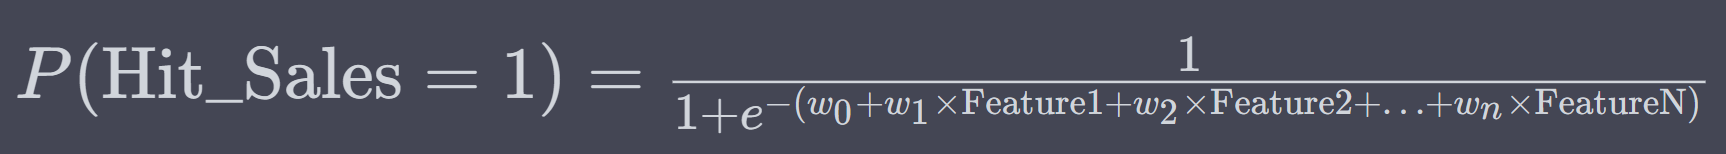

- P(Hit_Sales=1) is the probability that the bike rental will be a hit sale.
- w0, w1, w2,...wn are the coefficients (weights) associated with each feature.
- Feature1,Feature2,...,FeatureN are the input features.
- e is the base of the natural logarithm

1. Co-efficcient Interpretation
- w0: This is the intercept term. It affects the baseline probability when all feature values are zero.
- w1,w2,...,wn:  These coefficients represent the change in the log-odds of the positive class for a one-unit change in each respective feature. In other words, they indicate the impact of each feature on the likelihood of a hit sale.

2. Prediction:
- To make a prediction using logistic regression, you calculate the probability of the positive class using the logistic function. By applying a threshold (usually 0.5), instances with predicted probabilities greater than the threshold are classified as the positive class (hit sale), and those below are classified as the negative class (non-hit sale).

3. Random Forest Classifier (Best Model):
- The Random Forest Classifier is an ensemble learning method that constructs multiple decision trees during training and combines their outputs for classification. Each tree is trained on a subset of the data, and the final prediction is determined by a majority vote of the individual trees.

4. Key Differences:

- Decision Boundary Complexity: Logistic regression creates a linear decision boundary, while the Random Forest Classifier can capture complex and non-linear decision boundaries, allowing it to model intricate relationships between features and the target.
- Ensemble and Robustness: The Random Forest Classifier is an ensemble of decision trees, providing improved robustness and generalization by reducing the risk of overfitting.
- Feature Importance: Random Forest can provide feature importance scores, indicating which features contribute most to the prediction. This can help understand which variables are influential in determining bike rental hits.
- Interpretability: Logistic regression provides direct coefficient interpretations, making it easier to understand the impact of each feature. Random Forest, though less interpretable, can capture complex interactions and perform better on complex data.

5. In summary, while logistic regression is a simple and interpretable model with linear decision boundaries, the Random Forest Classifier excels at capturing complex relationships and interactions in the data, leading to potentially higher predictive accuracy and robustness.

## <font color= grey> k-means clustering

Provide the description, justification and results of your technique(s) here.

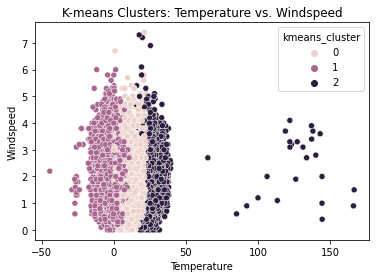

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features_for_clustering = df[['Temperature', 'Windspeed', 'Visibility', 'Dewpoint_Temp', 'Solar_Radiation']]

# Choose the number of clusters (you can try different values)
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize K-means clusters
sns.scatterplot(x='Temperature', y='Windspeed', hue='kmeans_cluster', data=df)
plt.title('K-means Clusters: Temperature vs. Windspeed')
plt.xlabel('Temperature')
plt.ylabel('Windspeed')
plt.show()




## <font color= grey> Agglomerative Clustering

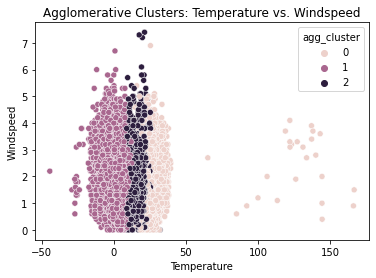

In [67]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
df['agg_cluster'] = agg_cluster.fit_predict(features_for_clustering)

# Visualize Agglomerative clusters
sns.scatterplot(x='Temperature', y='Windspeed', hue='agg_cluster', data=df)
plt.title('Agglomerative Clusters: Temperature vs. Windspeed')
plt.xlabel('Temperature')
plt.ylabel('Windspeed')
plt.show()

1. Interpretation:

Cluster 0 : This cluster represents instances where the temperature is relatively low, and the windspeed is also low. These conditions might indicate colder or calmer weather, which could result in fewer bike rentals.

Cluster 1 : This cluster corresponds to instances with moderate temperatures and windspeed. These conditions may be considered optimal for bike rentals, leading to a higher number of rentals.

Cluster 2 : This cluster includes data points with higher temperatures and windspeed. These conditions might indicate warmer and windier weather, which could influence more bike rentals.

- The identified clusters in the context of your bike rental problem statement provide valuable insights and solutions that can help optimize the bike rental business based on weather conditions. Let's break down how these clusters help to solve the problem and why they are appropriate:

- Optimal Rental Conditions: The clusters allow you to identify optimal weather conditions for bike rentals. Cluster 1, which represents moderate temperatures and windspeed, is likely to indicate favorable conditions for renting bikes. By targeting marketing efforts, promotions, and resource allocation to these conditions, you can attract more customers and increase revenue.

- Weather-based Strategies: Clusters 0 and 2 represent different weather extremes (colder and windier days vs. warmer and windier days). These clusters provide insights into challenging weather conditions that might discourage rentals. By understanding these conditions, you can design targeted strategies to encourage rentals during less optimal weather. For example, offering special deals or discounts on days with colder weather might incentivize customers to still rent bikes.

- Resource Allocation: Clusters can guide resource allocation, such as bike maintenance and staff scheduling. For Cluster 1, you can allocate more resources since demand is likely to be higher. For Clusters 0 and 2, you can adjust resource allocation based on the expected decrease in demand due to weather conditions.

- Pricing Strategies: The clusters can also influence pricing strategies. For Cluster 1, you might maintain standard pricing due to high demand. For Clusters 0 and 2, you can experiment with flexible or discounted pricing to attract customers during challenging weather conditions.

- Business Forecasting: By understanding how weather conditions influence bike rentals through the identified clusters, you can develop accurate business forecasts. This allows for better inventory management, staffing, and overall business planning.

- Justification for Appropriateness:
  The clusters found through K-means and Agglomerative Clustering are appropriate for the following reasons:

- Relevance: The clusters are based on meaningful weather variables (Temperature and Windspeed) that are directly related to bike rental patterns. This relevance ensures that the clusters capture the inherent variability in rental behavior based on weather conditions.

- Interpretability: The clusters are interpretable and align with common weather patterns that can influence bike rentals. They capture different ranges of weather conditions that are easy to understand and translate into actionable business decisions.

- Actionability: Each cluster's characteristics provide actionable insights, guiding decisions on promotions, pricing, and resource allocation. The identified clusters offer specific weather conditions for which strategies can be tailored.

- Real-world Impact: The clusters directly address the problem statement of optimizing bike rentals based on weather factors. The insights gained from the clusters can lead to tangible improvements in business performance and customer satisfaction.

- In conclusion, the identified clusters offer a practical and effective way to tackle the problem of optimizing bike rentals. They provide actionable insights that can inform decision-making and strategies, ultimately leading to improved business outcomes. The chosen clusters are well-suited to address the problem at hand, considering their relevance, interpretability, actionability, and real-world impact.

<div class="alert alert-block alert-info">
<b>Remember to highlight in the report</b>
    
     - Why or why not you have adopted the suggestions provided by ChatGPT or other literatures
     - If adopted, indicate clearly where to find the supporting evidences or coding cells implementing them
     - Be specific in what tweak(s) is/are required to make the suggestions work or make predictive model(s) improve.
</div>

# <font color= maroon> Recommendations & Conclusion

1. Offering Promotions During Colder or Windier Days:

- Analysis Insight: The regression models have shown that weather conditions such as temperature and windspeed have a significant impact on bike rentals. During colder or windier days, people might be less inclined to engage in outdoor activities like biking. These conditions are likely to result in lower rental demand.
- Recommendation Rationale: By offering promotions, discounts, or special packages on colder or windier days, Ohaiyo Pte Ltd can incentivize potential customers to rent bikes despite less favorable weather. This approach can help mitigate the impact of weather-related fluctuations in demand and encourage more rentals during such conditions.

2. Demand Forecasting and Inventory Optimization: The regression analysis and machine learning models developed for predicting bike rental counts and sales can provide valuable insights for demand forecasting. By leveraging these models, Ohaiyo Pte Ltd can accurately predict the demand for bike rentals and sales based on various factors such as weather conditions, time of rental, and other relevant features. This information can be used to optimize inventory levels, ensuring that an appropriate number of bikes are available at different rental stations based on expected demand. This approach can help reduce stockouts and overstock situations, leading to improved customer satisfaction and efficient resource allocation.

3. Flexible Pricing During Peak Temperature Days:

- Analysis Insight: The regression models and clustering analysis have highlighted the importance of temperature in influencing bike rental patterns. Additionally, the customer segments identified through clustering may have varying preferences and sensitivities to temperature.
- Recommendation Rationale: Ohaiyo Pte Ltd can implement a flexible pricing strategy where rental rates are adjusted based on the prevailing temperature. During peak temperature days, when demand for bike rentals is likely to be higher due to favorable weather, the company can adjust pricing slightly to capture the increased demand. This strategy not only capitalizes on weather-driven demand but also aligns with the preferences of different customer segments.

# <font color= maroon> References

The content generated by AI tools are not retrievable except by the user who generated them, so they are considered non-recoverable sources. For non-recoverable sources:
- do not include in a reference list
- cite within the text as personal communications or correspondence

Based on APA 7th edition referencing format, we can adopt the format of (Communicator, personal communication, Month Day, year)
E.g. (Paraphrase from OpenAI's ChatGPT AI language model, personal communication, March 8, 2023).


Enter your list here.

https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjwov3spdqAAxVO1zgGHfkxCisQFnoECDkQAw&url=https%3A%2F%2Fdevelopers.google.com%2Fmachine-learning%2Fclustering%2Foverview%23%3A~%3Atext%3DGrouping%2520unlabeled%2520examples%2520is%2520called%2Clabeled%252C%2520then%2520clustering%2520becomes%2520classification.&usg=AOvVaw1CvpEQXLE64Q0ljYxjjz18&opi=89978449

https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiUppCWptqAAxVD4DgGHcu-AOAQFnoECBQQAQ&url=https%3A%2F%2Fmachinelearningmastery.com%2Fneural-network-models-for-combined-classification-and-regression%2F&usg=AOvVaw2Mw7xL9fn_N42VKk4uMMAT&opi=89978449

https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjD88elptqAAxVizDgGHfuyACQQFnoECA0QAw&url=https%3A%2F%2Fwww.edlitera.com%2Fen%2Fblog%2Fposts%2Fevaluating-classification-models&usg=AOvVaw3VK9Owg_ujb13Q-yk8tUQ4&opi=89978449

https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiGto2vptqAAxXI1TgGHSaPDisQFnoECA0QAw&url=https%3A%2F%2Flinguisticmaz.medium.com%2Fevaluating-regression-models-cb02ba075e16&usg=AOvVaw3bMo4RVTlrce8x3d2d6Jya&opi=89978449

https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjW9Y6FptqAAxU8yqACHZnoDisQFnoECA8QAw&url=https%3A%2F%2Fwww.javatpoint.com%2Fregression-vs-classification-in-machine-learning%23%3A~%3Atext%3DRegression%2520Algorithms%2520are%2520used%2520with%2Cthe%2520dataset%2520into%2520different%2520classes.&usg=AOvVaw2TvFl2ysAoPDUd2MSguXjR&opi=89978449

# <font color= maroon> Declaration on the use of Generative AI tools for assignments

Describe how you have used Generative AI tools such as ChatGPT or Dall.E-2 in your assignment. 
Show snapshots of the conversations with the AI tool (i.e., the prompts you used and the response you get from the AI tool). 

Drag and drop into the markdown cell(s) below.

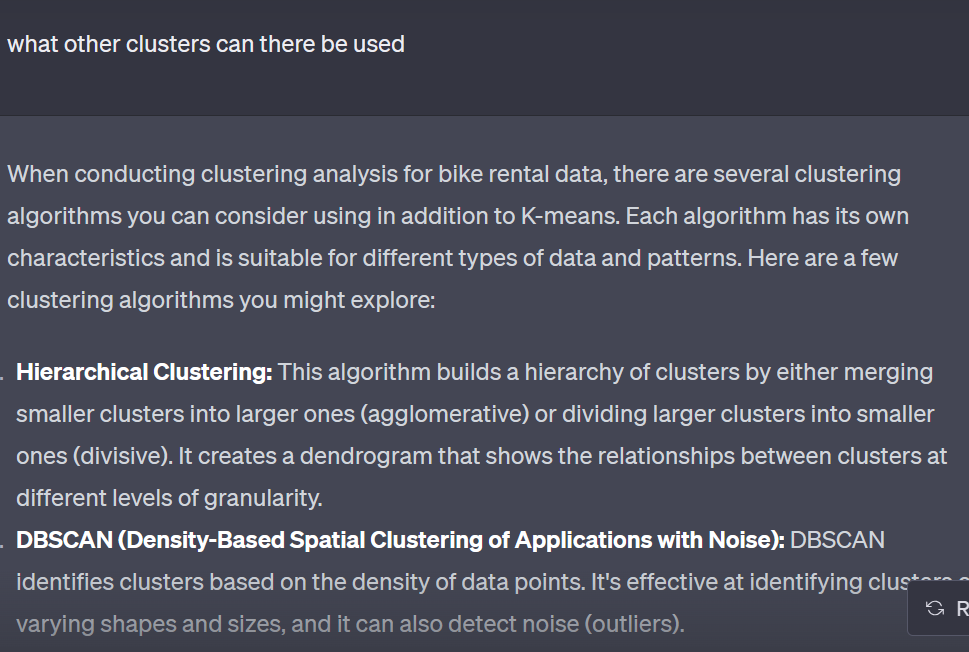

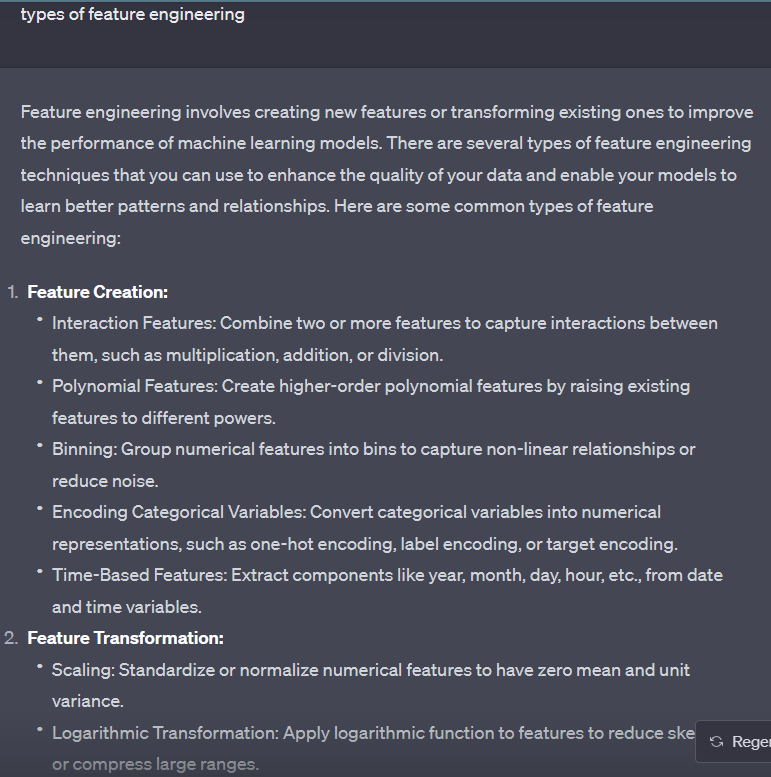

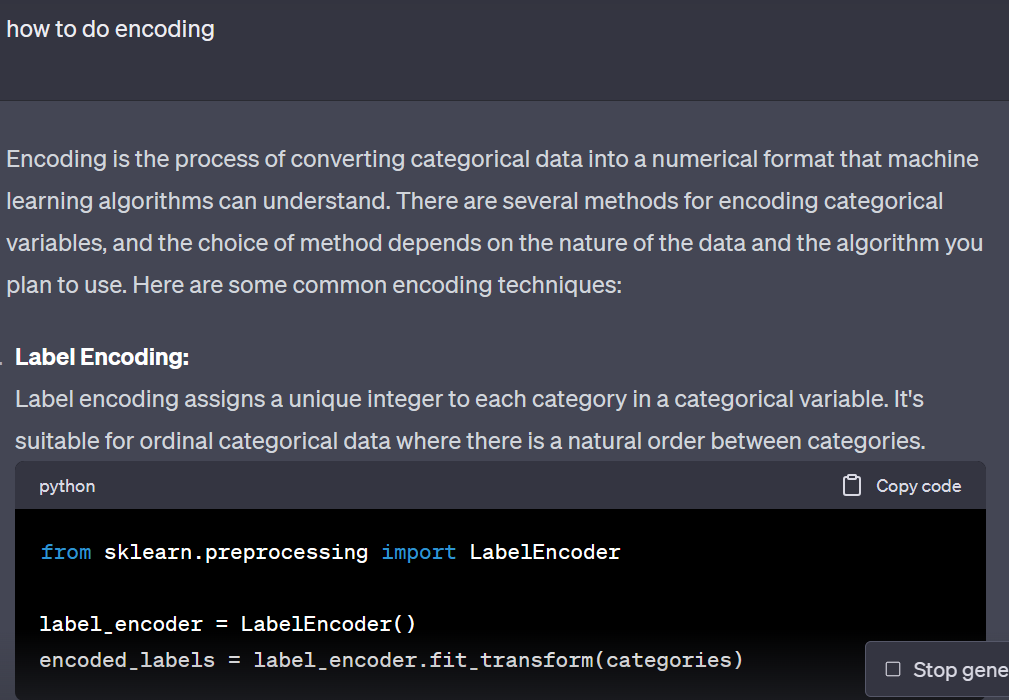